<a href="https://colab.research.google.com/github/Bhojraj-Jadhav/Bike-shairing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project name:-** Bike Sharing Demand Prediction

###**Type :-** Supervised Machine Learning

### **Contribution**    :- Individual.


##### **Name :-** Bhojraj Jadhav




# **Project Summary :-**
The contents of the data came from the capital city of South Korea known as Seoul having population around 9.7 million. It use to be the 4th largest metropolitan economy in 2014. It has humid continental climate influenced by monsoons. The data had variables such as date, hour, temperature, humidity, wind-speed, visibility, dew point temperature, solar radiation, rainfall, snowfall, seasons, holiday, functioning day and rented bike count.
The task was to build a machine learning model that could predict the bike required for an hour by considering given fatures. The first step in the exercise involved exploratory data analysis where we tried to dig insights from the data in hand. It included univariate and multivariate analysis in which we identified certain trends, relationships, correlation and found out the features that had some impact on our dependent variable. The second step was to clean the data and perform modifications. We checked for missing values and outliers and removed irrelevant features. We also encoded the categorical variables. The third step was to try various machine learning algorithms like Linear regression, Random forest and Decision Tree on our split and standardized data. The best performance was given by the Gradient boosting and Random forest model where the R2_score for training and test set was 0.83 and 0.81 respectively.
The most important features which had a major impact on the model predictions were hour, temperature, wind-speed, solar-radiation, month and seasons. Demand for bikes raised along with raise in temperature and hour, drop in wind-speed and solar radiation and during springs and summer seasons, where as very low during winters.
•	Even after the successful performance tests there might be chances of failure to meet the expectations because of inconsistencies in values of temperature, wind-speed, solar radiations, etc. We have to prepared for all contingencies and also keep checking our model from time to time.


**GitHub Link :-** https://github.com/Bhojraj-Jadhav

# **Problem Statement**

 To combine the historical bike usage patterns with the weather data in order to forecast bike rental demand.





Target Column to be predicted: COUNT- for each hour to be stable supply of rental bikes.

Input Columns used as variables .[Date ,Rented bike count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar radiation,Rainfall,Snowfall,Season,Holiday,Functioning day]



# **Business Objective :-**

The objective of the project is to perform exploratory data analysis, data
pre-processing, data cleaning & imputation, and in the end, apply different Data Visualization techniques to get meaningful insights and apply different models to predict from the given data. Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

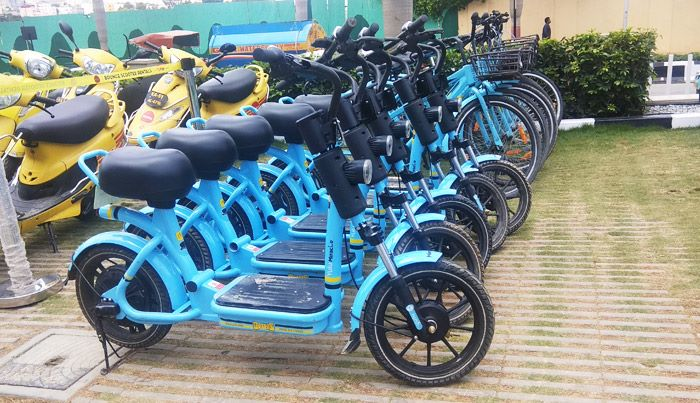

# Lets begin with importing the libraries and Loading the dataset

In [ ]:
# Firstly Importing the libraries which is required to perform coding operations.
# Importing the modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import make_pipeline

from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the CSV.
df= pd.read_csv('/content/drive/MyDrive/Ml project1/SeoulBikeData.csv', encoding= 'unicode_escape')

##**Exploring Data**

In [ ]:
# Let's take a first look at data.

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Last 5 rows

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Shape of data.

print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 8760 rows and 14 columns.


## <b>Preprocessing the data </b>


* Deal with null/missing values

* Deal with duplicate data

* Breaking date column

##**Dealing with Missing values/ Null Values**

In [ ]:
# Information of dataset i.e checking null counts in columns and data type of each.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Checking the null values of data.

df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Here we don't have any missing values in our dataset.

##**Features description:-**

Date : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

Rented Bike Count : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

Hour: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

Temperature(°C) : Temperature in Celsius, type : Float

Humidity(%) : Humidity in the air in %, type : int

Wind speed (m/s) : Speed of the wind in m/s, type : Float

Visibility (10m) : Visibility in m, type : int

Dew point temperature(°C) : Temperature at the beggining of the day, type : Float

Solar Radiation (MJ/m2) : Sun contribution, type : Float

Rainfall(mm) : Amount of raining in mm, type : Float

Snowfall (cm) : Amount of snowing in cm, type : Float

Seasons : Season of the year, type : str, there are only 4 season's in data .

Holiday : If the day is holiday period or not, type : str

Functioning Day : If the day is a Functioning Day or not, type : str

In [ ]:
# Important columns names.

column=df.columns
column

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Description of data. (i.e statistical values)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


## Handling duplicate data

In [ ]:
# Checking Duplicate Values

value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


  * There are no duplicate values present in our dataset.

##Handling  outliers

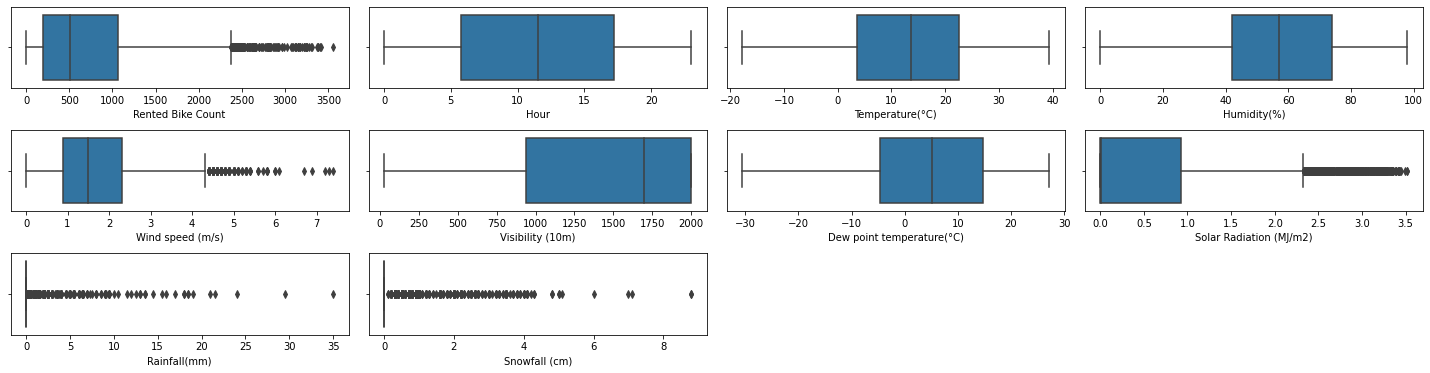

In [ ]:
# looking for outliers of every feature of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1

for col in df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1

plt.tight_layout()

* Rented Bike count contains outliers.

* Wind Speed, Solar Radiation, Rainfall, and Snowfall contains outlier values which are acceptable.

 ## Extracting day, month, and day of week from Date column

In [ ]:
# Converting the format of 'Date' column into standard date-time format.

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Creating a column extract year from the date.

year = []
for i in range(len(df['Date'])):
  year.append(df['Date'][i].year)
df['year'] = year


In [ ]:
# Creating a column containing the month from a particular date.

months = []
for i in range(len(df['Date'])):
  months.append(df['Date'][i].month)
df['month'] = months



#**Feature Engineering**

Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

##**Normalizing Rented_Bike_Count column data**

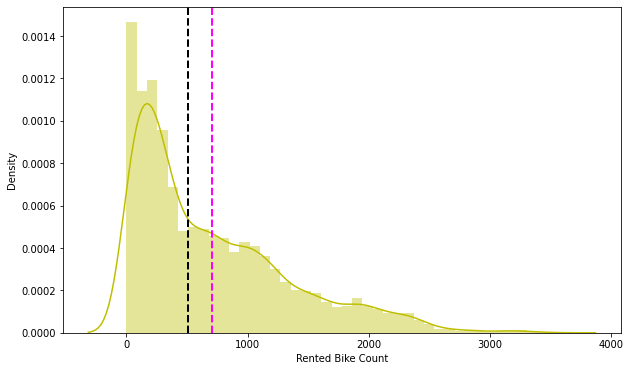

In [ ]:
# Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented Bike Count'],hist=True ,color="y")
ax.axvline(df['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

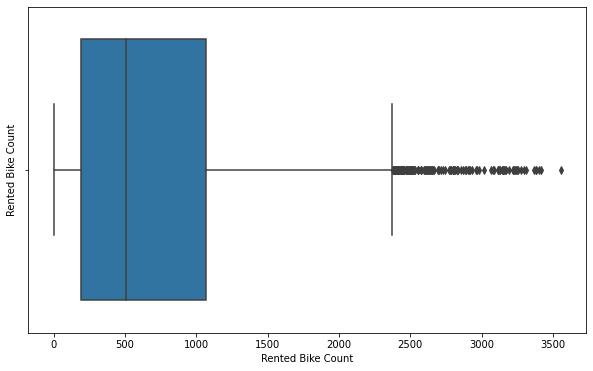

In [ ]:
# Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=df['Rented Bike Count'])
plt.show()

The above boxplot shows that we have detect outliers in Rented Bike Count column

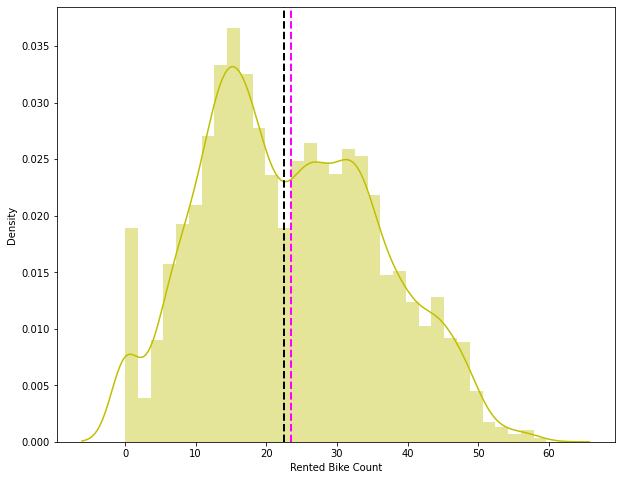

In [ ]:
# Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="y")
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

* Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.

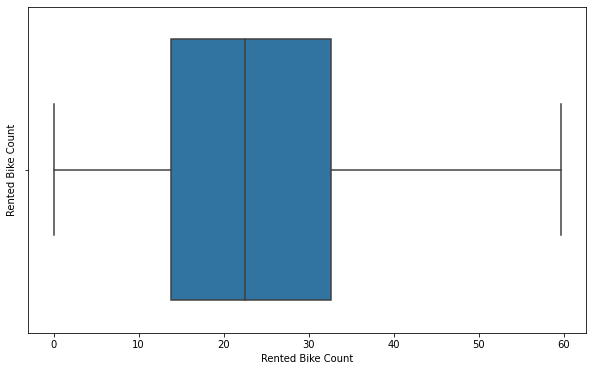

In [ ]:
# After applying square root on Rented Bike Count check whether we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()

* After doing square root of Rented Bike Counts no outliers were detected

##Checking categorical features

In [ ]:
# Extracting categorical features.

categorical_features= df.select_dtypes(include='object')
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


Here we found 3 columns of categorical features

In [ ]:
# Check Unique Values for each variable.

for i in categorical_features:
   print(" %s" % i,sep = '\n')
   print(df[i].value_counts())
   print("-"*40)

 Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
----------------------------------------
 Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
----------------------------------------
 Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64
----------------------------------------


In [ ]:
 # Date wise rented bike count.

df_Date = df.groupby('Date').sum()['Rented Bike Count']
df_Date

Date
2017-01-12     9539
2017-02-12     8523
2017-03-12     7222
2017-04-12     8729
2017-05-12     8307
              ...  
2018-12-07    29428
2018-12-08    17498
2018-12-09    31809
2018-12-10    26237
2018-12-11    21003
Name: Rented Bike Count, Length: 365, dtype: int64

##***Exploratory Data Analysis***

##**Univariate Analysis**

In [ ]:
# Differentiating the rented bike count for Holiday Non holiday.

df_holiday = df.groupby('Holiday').sum()['Rented Bike Count']
df_holiday

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

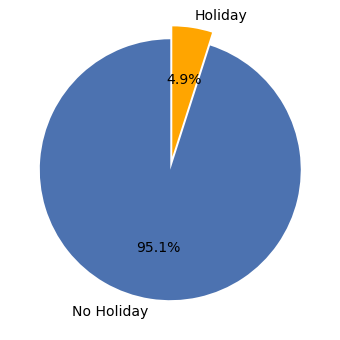

In [ ]:
# Creating visualization for the differentiation of rented bike count for Holiday Non holiday.
plt.rcParams['figure.figsize'] = 6,6
labels = df['Holiday'].value_counts().index.tolist()
sizes = df['Holiday'].value_counts().tolist()
explode = (0, 0.1)
colors = ['#4c72b0', 'orange']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

Rented bike count is higher in Non holiday

In [ ]:
# Rented bike count on the basis of seasons.

season_by= df.groupby('Seasons').sum()
season_by

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month
Seasons,,,,,,,,,,,,
Autumn,1790002,25116,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0,4407312,18816
Spring,1611909,25392,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0,4455744,10992
Summer,2283234,25392,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0,4455744,15048
Winter,487169,24840,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6,4358136,12312


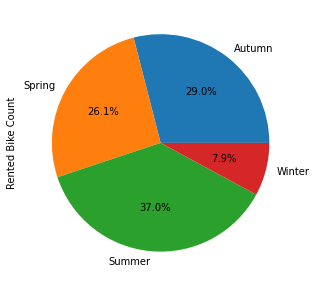

In [ ]:
# Checking percent counts of the seasons.

season_by['Rented Bike Count'].plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(5, 5));



1. Autumn : 29%.
2. winter: 7.9%.
3. Summer: 37.0%.
4. Spring: 26.1%.


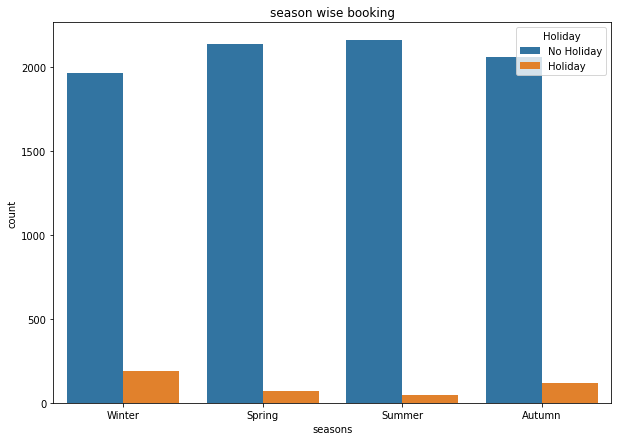

In [ ]:
# Differentiation between holiday and working day on seasonal basis.

plt.figure(figsize=(10,7))
sns.countplot(x=df['Seasons'],hue=df['Holiday'])
plt.title ("season wise booking")
plt.xlabel('seasons')
plt.ylabel('count');

Here we can clearly see that the number of booking the bike is more on working days than the holiday

In [ ]:
# Rented bike count on hourly basis .

hour_wise = df.groupby('Hour').sum()['Rented Bike Count']
hour_wise

Hour
0     197633
1     155557
2     110095
3      74216
4      48396
5      50765
6     104961
7     221192
8     370731
9     235784
10    192655
11    219311
12    255296
13    267635
14    276971
15    302653
16    339677
17    415556
18    548568
19    436229
20    390172
21    376479
22    336821
23    244961
Name: Rented Bike Count, dtype: int64

##**Bivariate Analysis**

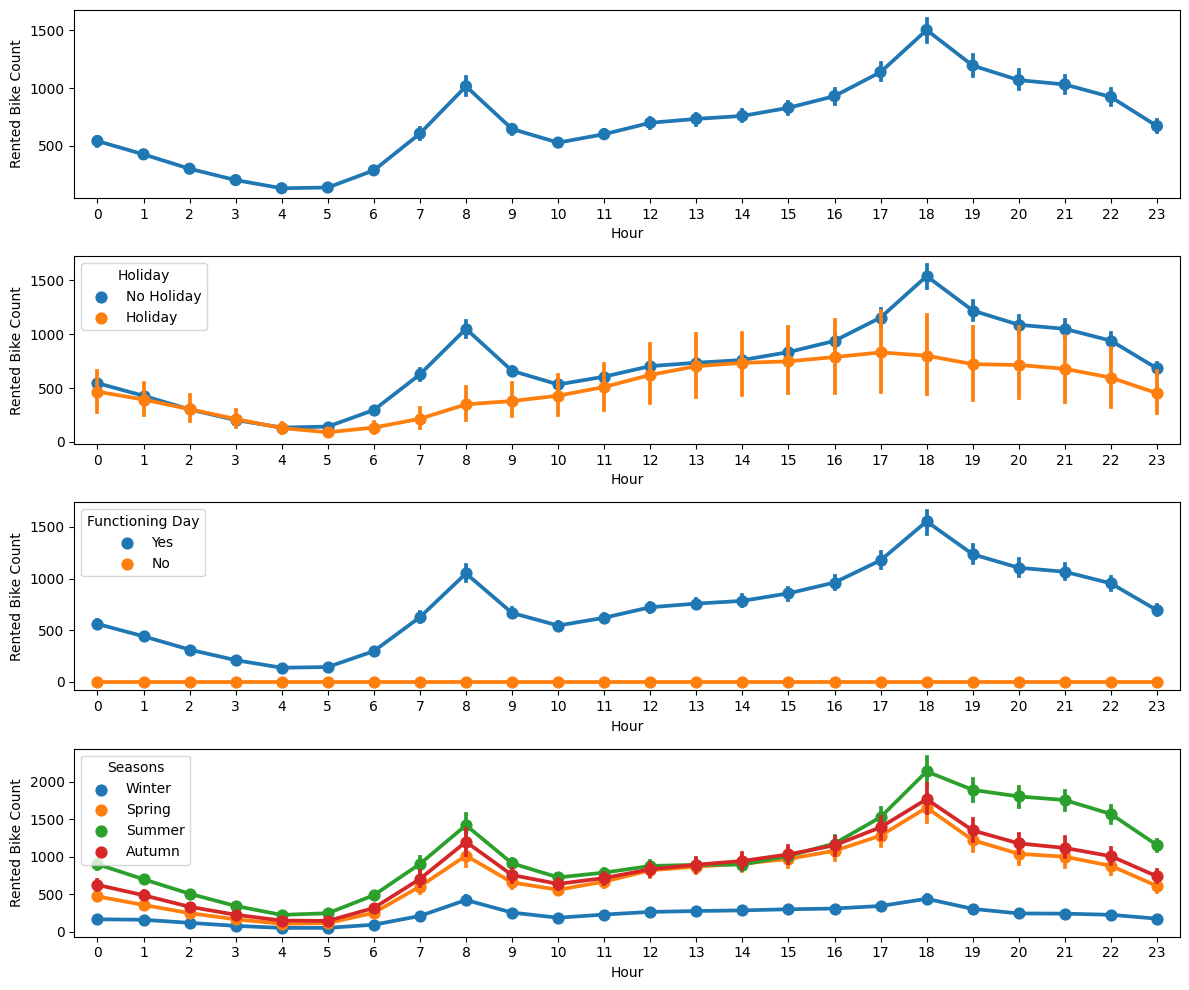

In [ ]:
# Rented bike count as per hour,holidays,seasons,functional day.

fig, axs = plt.subplots(nrows=4,ncols=1,figsize=(12,10), dpi=100)
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[0])
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[1],
              hue="Holiday")
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[2],
              hue="Functioning Day")
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[3],
              hue="Seasons")
plt.tight_layout()

1. On the basis of hour, the plot shows at 8th hour and 18th hour has maximum bookings.
2. 2nd plot shows the relation between the holiday and non holiday on hourly basis.
3. 4th plot shows the data of relation between the hourly and seasonly basis.
  

In [ ]:
# Numeric Features

numeric_features= df.select_dtypes(exclude='object')

# Numeric Features info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  year                       8760 non-null   int64         
 12  month 

In [ ]:
# describing numeric feature

numeric_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


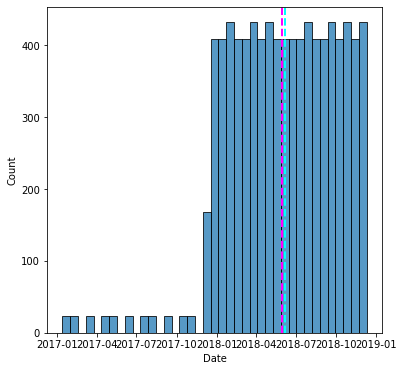

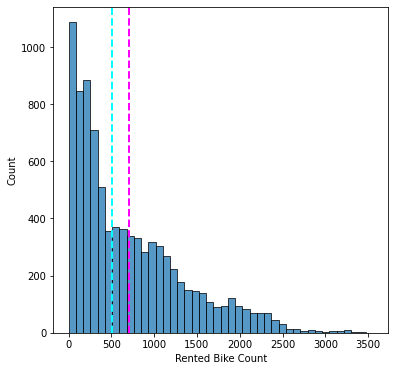

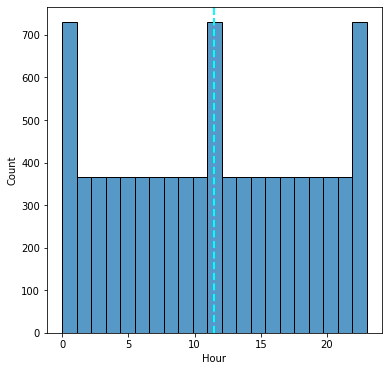

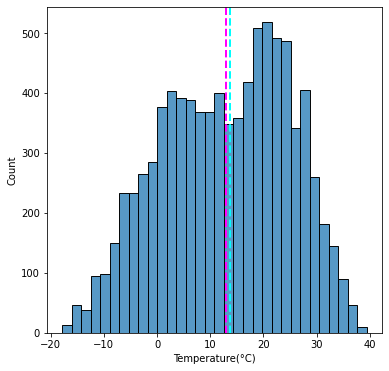

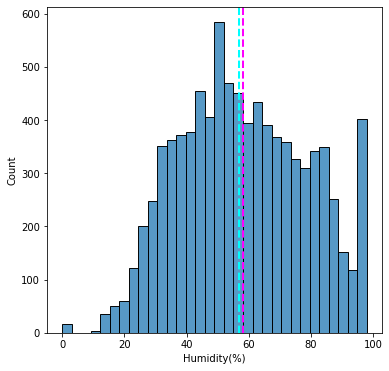

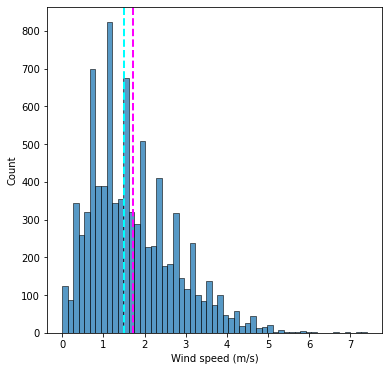

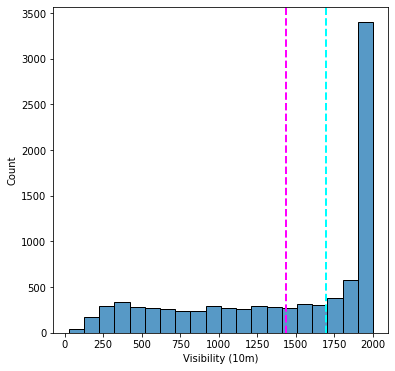

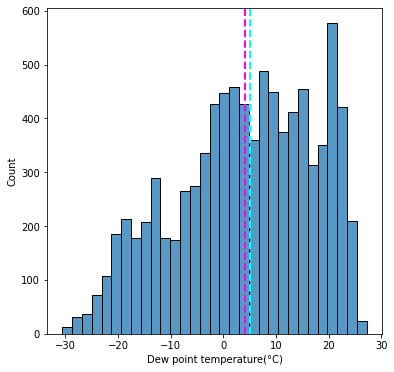

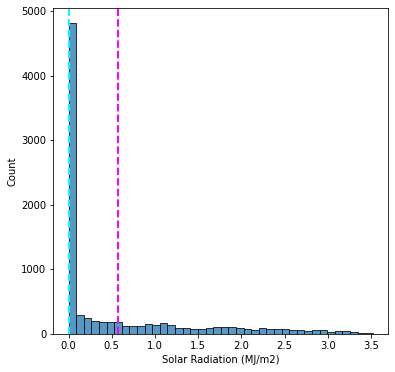

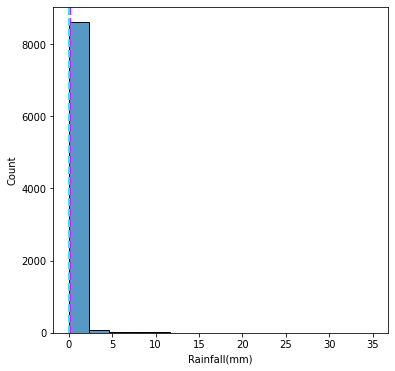

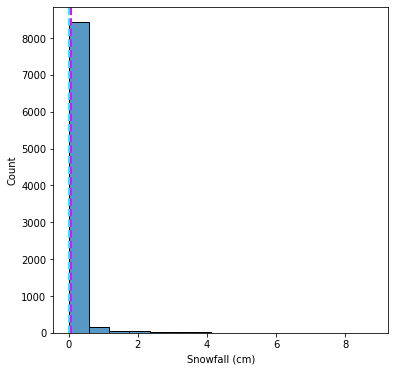

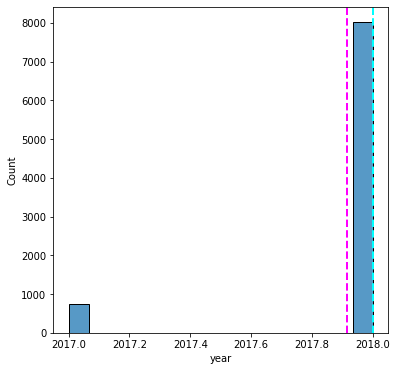

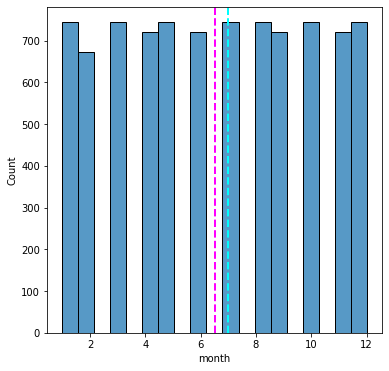

In [ ]:
# Checking the skewness and mean-median between all the features.

# plotting histogram

for col in numeric_features[:]:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.show()

Checking the skewness and mean-median between all the features.

1. Temperature data shows the symmetric distribution for the booking count, at specific range of temperature booking count goes higher.

2. In the Humidity plot there is mere colinear with the temperature column.

3. In the windspeed relation as the wind speed increases the booking count goes decreasing.

4. visibility counts increases beyond the 1750 units.

5. As the dewpoint temperature increase the counts or booking increases simultaneously.

6. Other column are either categorical or non correlated to the booking count.

##**Feature Manipulation**


## Encoding categorical column



In [ ]:
# Creating a dummy variables for the season column.

df['Winter'] = np.where(df['Seasons']=='Winter', 1, 0)
df['Spring'] = np.where(df['Seasons']=='Spring', 1, 0)
df['Summer'] = np.where(df['Seasons']=='Summer', 1, 0)
df['Autumn'] = np.where(df['Seasons']=='Autumn', 1, 0)

df.drop(columns=['Seasons'],axis=1,inplace=True)

Linear algorithm only takes numeric data to compute the algorithm so converted the object format of season column into binary format.
  

In [ ]:
# encoding 'Holiday' column with 0 and 1.

for i in range(len(df['Holiday'])):
  if df['Holiday'][i] == 'No Holiday':
    df['Holiday'][i] = 0
  else:
    df['Holiday'][i] = 1

Dealing with another object type column (i.e holiday non holiday into binary format)

In [ ]:
# encoding 'Functioning Day' column with 0 and 1.

for i in range(len(df['Functioning Day'])):
  if df['Functioning Day'][i] == 'Yes':
    df['Functioning Day'][i] = 1
  else:
    df['Functioning Day'][i] = 0

Again checking the data by taking a look at the first 5 columns

In [ ]:
# Taking the look for the data after opration.

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,month,Winter,Spring,Summer,Autumn
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0


##**Handling outliers**

Finding the Inter quartile range for the purpose to
deal with Outliers.

In [ ]:
# finding the inter-quartile range.

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count             874.25
Hour                           11.50
Temperature(°C)                19.00
Humidity(%)                    32.00
Wind speed (m/s)                1.40
Visibility (10m)             1060.00
Dew point temperature(°C)      19.50
Solar Radiation (MJ/m2)         0.93
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
year                            0.00
month                           6.00
Winter                          0.00
Spring                          1.00
Summer                          1.00
Autumn                          0.00
dtype: float64


In [ ]:
# listing features to remove outliers.

features = list(df.columns)
features = features[2:]
list_0 = ['Hour','Winter','Spring','Summer','Autumn','Holiday','Functioning Day','month','year']
new_features = [x for x in features if x not in list_0]

Here we get columns to compute the further problem.


In [ ]:
# printing the column for new features.

new_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
# Finding the lower and the upper range of the outliers.

df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |
                                      (df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

Finding the lower and the upper bracket for determining the outliers.

In [ ]:
# checking the null value count after removing the outliers.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            7078 non-null   float64       
 4   Humidity(%)                7078 non-null   float64       
 5   Wind speed (m/s)           7078 non-null   float64       
 6   Visibility (10m)           7078 non-null   float64       
 7   Dew point temperature(°C)  7078 non-null   float64       
 8   Solar Radiation (MJ/m2)    7078 non-null   float64       
 9   Rainfall(mm)               7078 non-null   float64       
 10  Snowfall (cm)              7078 non-null   float64       
 11  Holiday                    8760 non-null   object        
 12  Functi

**Fill the null space created by removing outlier with mean**

In [ ]:
# filling null values with mean values.

df['Temperature(°C)'] = df['Temperature(°C)'].fillna(df['Temperature(°C)'].mean())

df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())

df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].mean())

df['Visibility (10m)'] = df['Visibility (10m)'].fillna(df['Visibility (10m)'].mean())

df['Dew point temperature(°C)'] = df['Dew point temperature(°C)'].fillna(df['Dew point temperature(°C)'].mean())

df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].fillna(df['Solar Radiation (MJ/m2)'].mean())

df['Rainfall(mm)'] = df['Rainfall(mm)'].fillna(df['Rainfall(mm)'].mean())

df['Snowfall (cm)'] = df['Snowfall (cm)'].fillna(df['Snowfall (cm)'].mean())

After removing the outliers Filling the null counts with the mean of the respected columns.


Checking the correlation between the columns after take a look at outliers.


# Deal with multicollinearity

In [ ]:
# dropping columns with more (or less) correlation.

df.drop(columns=['Dew point temperature(°C)','Date','Rainfall(mm)','Snowfall (cm)','year'],axis=1,inplace=True)

Dropping the columns having multicolinearity with each other.(i.e their beta values are same)

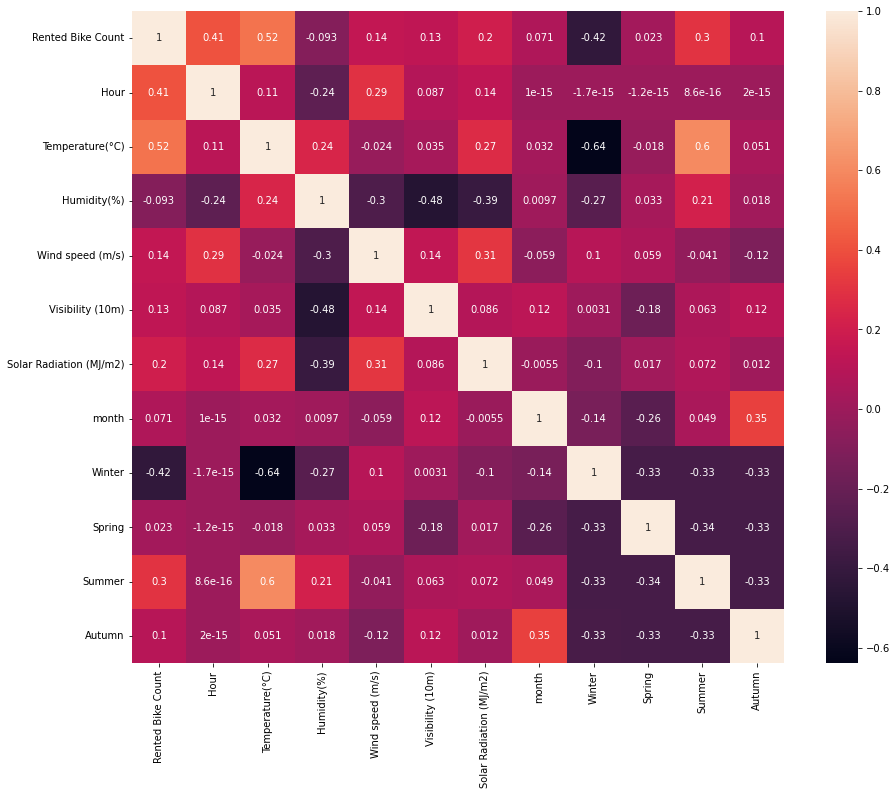

In [ ]:
# extracting correlation heatmap.

plt.figure(figsize=(15,12))
sns.heatmap(df.corr('pearson'),annot=True, square=True);

In [ ]:
#  Multicollinearity from variation infletion factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# multicollinearity result.

calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Date']]])

,variables,VIF
0,Hour,1.186328
1,Temperature(°C),2.871155
2,Humidity(%),2.137895
3,Wind speed (m/s),1.264894
4,Visibility (10m),1.503631
5,Solar Radiation (MJ/m2),1.591228
6,month,1.211705
7,Winter,16.509521
8,Spring,17.996409
9,Summer,22.666811


Variation inflation factor shows the collinearity index of that column with respect to the dependent variable.

In [ ]:
# dropping "summer" column as it adds to multicollinearity.

df.drop(columns=['Summer'],axis=1,inplace=True)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Date']]])

,variables,VIF
0,Hour,4.232652
1,Temperature(°C),6.982894
2,Humidity(%),10.146646
3,Wind speed (m/s),5.800116
4,Visibility (10m),7.565901
5,Solar Radiation (MJ/m2),2.203240
6,month,5.226156
7,Winter,3.829748
8,Spring,2.343245
9,Autumn,2.386321


Checking the variation inflation factor after removing the summer column.


In [ ]:
# Taking a look at the data after dealing with outliers (filling the values with mean).

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   float64
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   float64
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Holiday                  8760 non-null   object 
 8   Functioning Day          8760 non-null   object 
 9   month                    8760 non-null   int64  
 10  Winter                   8760 non-null   int64  
 11  Spring                   8760 non-null   int64  
 12  Autumn                   8760 non-null   int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 889.8+ KB


In [ ]:
# converting object type columns to float.

df['Functioning Day'] = df['Functioning Day'].astype(float)
df['Holiday'] = df['Holiday'].astype(float)

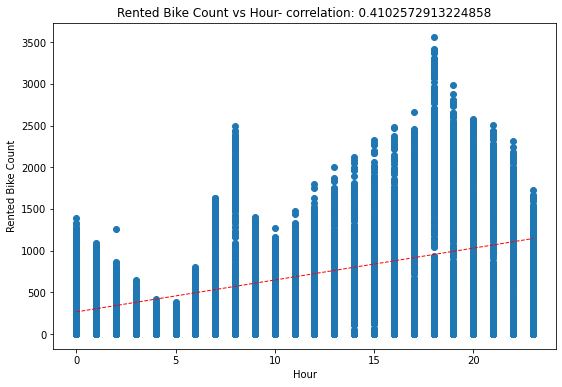

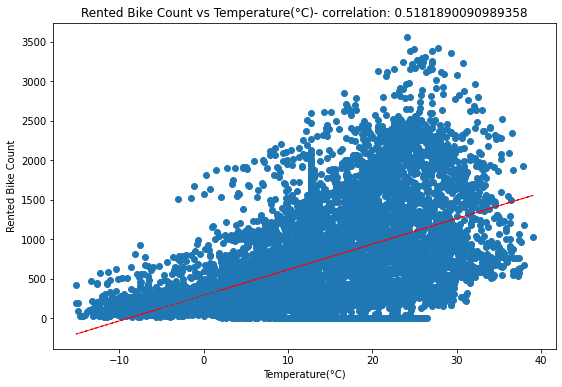

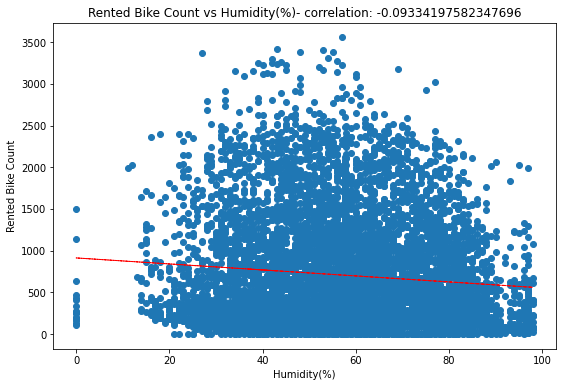

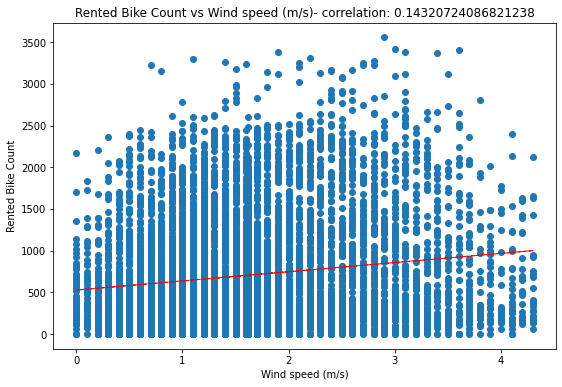

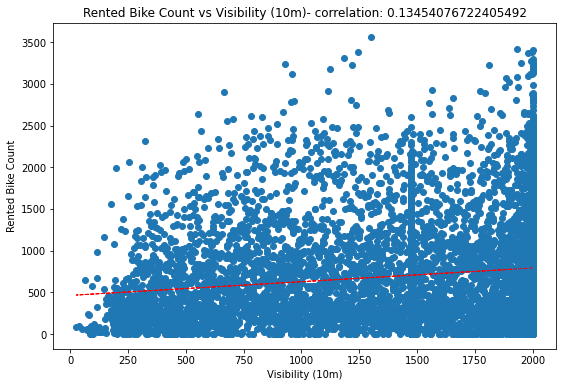

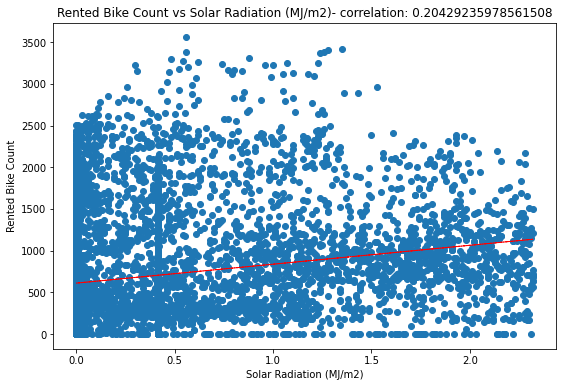

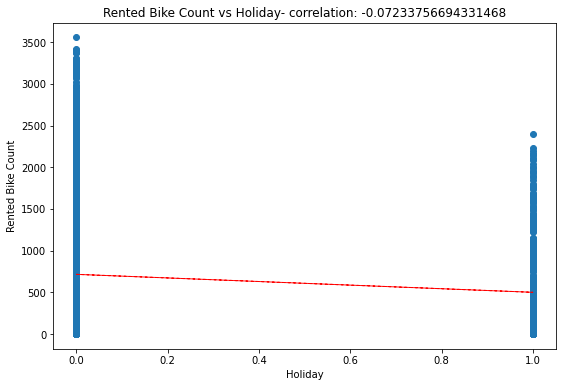

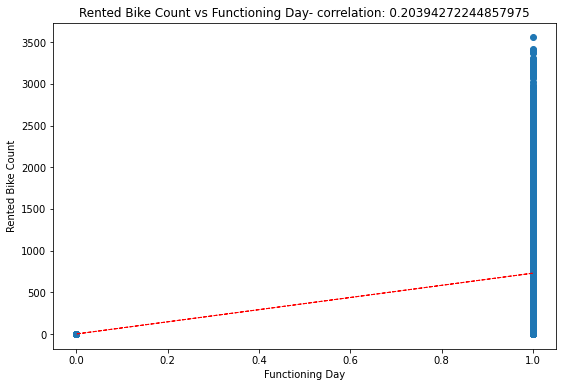

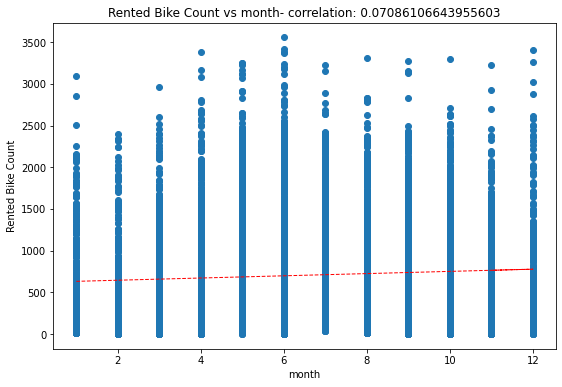

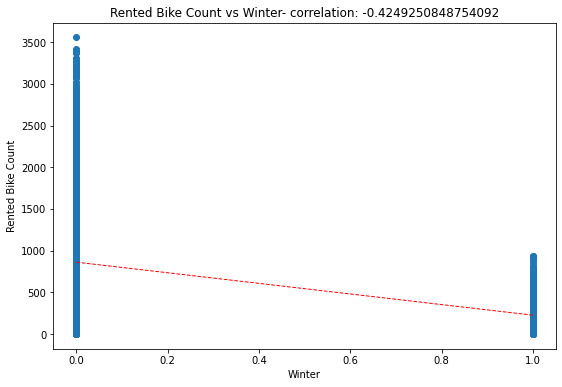

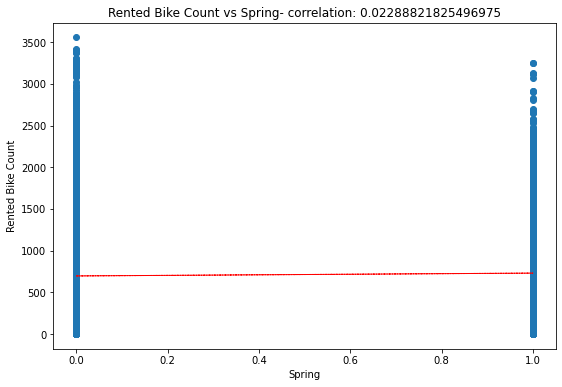

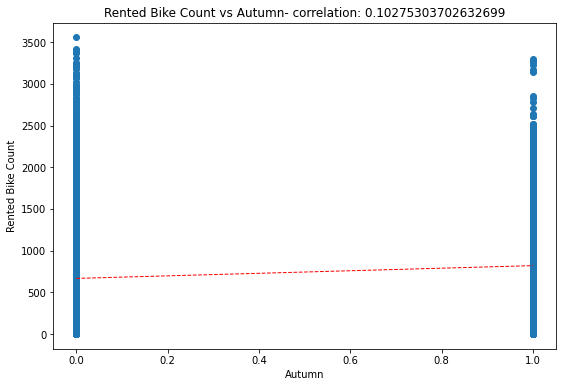

In [ ]:
# obtaining correlation plots between dependent and independent variables.

numeric_features = df.columns
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

The red line passing through the scattered plot shows the linear function of the rented bike count and the respected features.


# Data Preparation

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Holiday,Functioning Day,month,Winter,Spring,Autumn
0,254,0,-5.2,37.0,2.2,2000.0,0.0,0.0,1.0,1,1,0,0
1,204,1,-5.5,38.0,0.8,2000.0,0.0,0.0,1.0,1,1,0,0
2,173,2,-6.0,39.0,1.0,2000.0,0.0,0.0,1.0,1,1,0,0
3,107,3,-6.2,40.0,0.9,2000.0,0.0,0.0,1.0,1,1,0,0
4,78,4,-6.0,36.0,2.3,2000.0,0.0,0.0,1.0,1,1,0,0


In [ ]:
# Train - Splitting  data
X=df.drop(['Rented Bike Count'],axis=1)

In [ ]:
y=np.sqrt(df['Rented Bike Count'])

In [ ]:
# Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
 # Scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train =std.fit_transform(X_train)
X_test = std.transform(X_test)

Splitting the data in to train and test scaling it so that the various types of magnitudes are getting fit into standard distribution.( µ=0 and σ'=1)


##***Creating Function to train linear models and calculate scores***

In [ ]:
# Creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [ ]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

  # training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('Evaluation Matrix')

  # finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  # finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  # finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)

  # finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)

  # appending metric to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  # plotting the line graph of actual and predicted values
  print('Evaluation Graph')
  plt.figure(figsize=(12,8))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):

    # Fit Model
    model.fit(X_train,y_train)

    # Get Metrics

    preds = model.predict(X_test)

    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('Evaluation Matrix')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)

    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)

    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting
    print('Evaluation Graph')
    plt.figure(figsize=(12,8))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 8})
    plt.show()

# Linear Regression

In [ ]:
# linear regression model

linear_model= LinearRegression()

Evaluation Matrix
MSE : 191763.43161580173
RMSE : 437.9080173002108
R2 : 0.5335735164462672
Adjusted R2 :  0.5310024931101878
Evaluation Graph


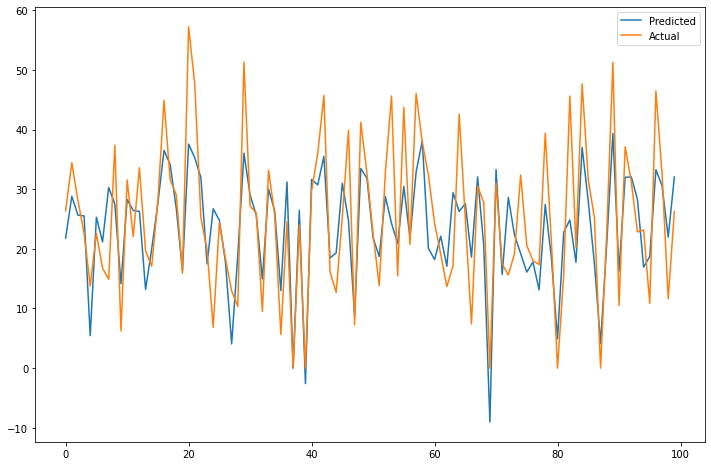

In [ ]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

#Lasso regression

In [ ]:
# finding the best parameters for lasso by gridsearchcv

lasso_model = Lasso()

# setting the parameters of the lasso model

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)

Evaluation Matrix
MSE : 191763.43161580164
RMSE : 437.9080173002107
R2 : 0.5335735164462674
Adjusted R2 :  0.531002493110188
Evaluation Graph


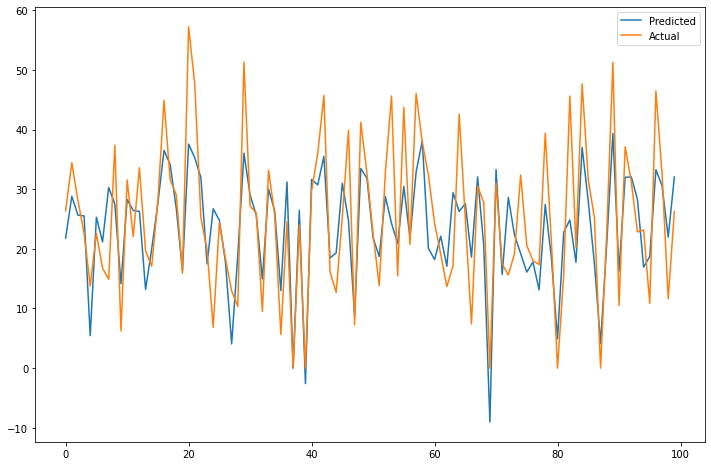

In [ ]:
# calling train_linear_model to train,fit and evalution of lasso model.

train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

#Ridge regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

Evaluation Matrix
MSE : 191822.2678659184
RMSE : 437.97519092514636
R2 : 0.5334304089464891
Adjusted R2 :  0.5308585967771542
Evaluation Graph


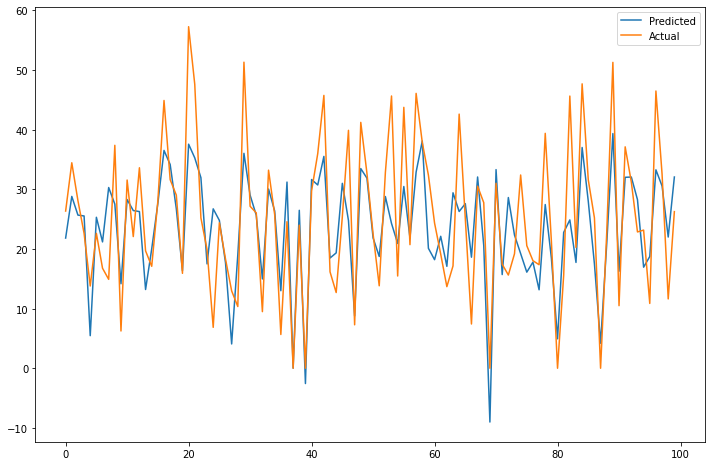

In [ ]:
# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

#Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

Evaluation Matrix
MSE : 191835.56057552726
RMSE : 437.9903658478429
R2 : 0.533398077068886
Adjusted R2 :  0.5308260866806576
Evaluation Graph


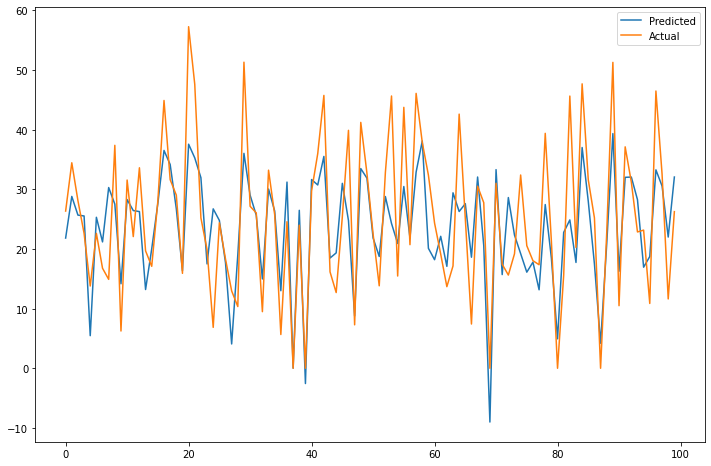

In [ ]:
# calling train_linear_model to train,fit and evalution of elastic net model.

train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

##**Polynomial Regression**

In [ ]:
# Creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
# Importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

Evaluation Matrix
MSE : 152553.0275204221
RMSE : 390.5803726768949
R2 : 0.6289450413862796
Adjusted R2 :  0.6268997223677382
Evaluation Graph


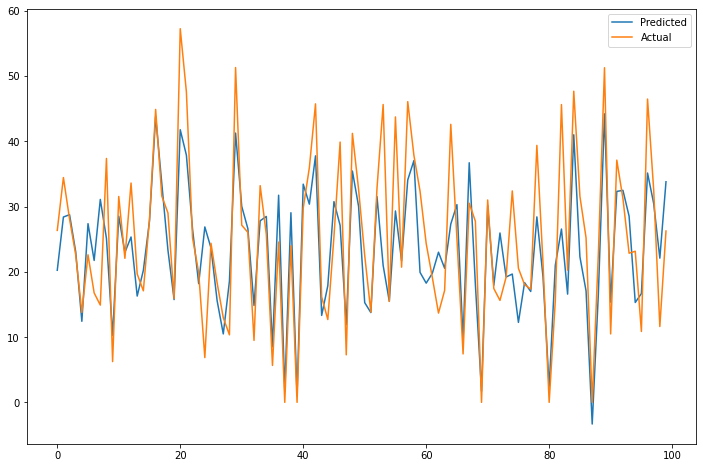

In [ ]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

# Decision-tree model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Evaluation Matrix
MSE : 38.47213591780864
RMSE : 6.2025910648541585
R2 : 0.7488487056584434
Adjusted R2 :  0.7474643163465009
Evaluation Graph


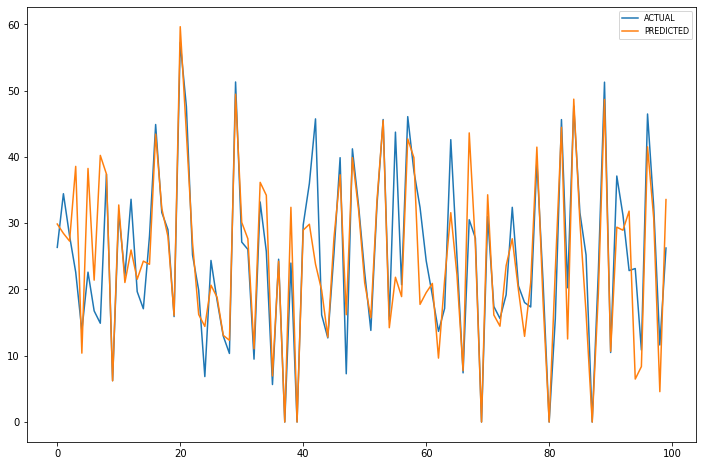

In [ ]:
# creating decision tree model
dt_model = DecisionTreeRegressor()
# calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

# Random forest regression model

In [ ]:
# importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# creating model of random forest
rf_model = RandomForestRegressor()

In [ ]:
# creating param dict to check random forest with different value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [ ]:
# creating rf_grid model to run rf model with gridsearch.

rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)

Evaluation Matrix
MSE : 27.014109892735114
RMSE : 5.1975099704315255
R2 : 0.8236482455889618
Adjusted R2 :  0.8226761642600998
Evaluation Graph


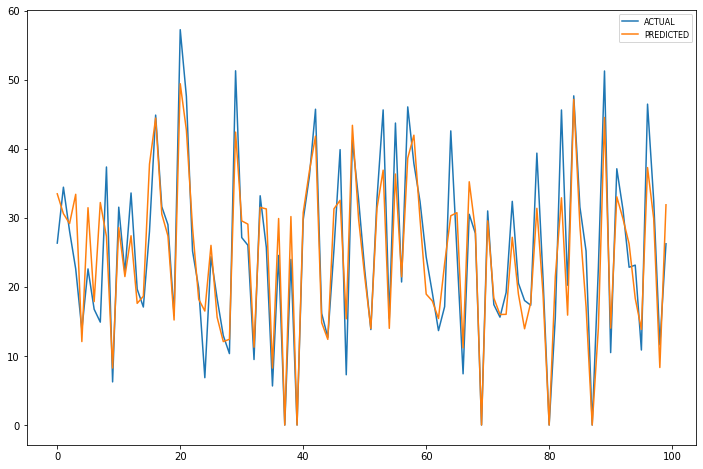

In [ ]:
# calling run_model to train,fit and evalution of decision tree model.

run_model(rf_grid,X_train,y_train,X_test,y_test)

##**Gradient Boosting**

In [ ]:
# Importing Gradient Boosting Regressor.

from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [ ]:
# Creating param dict to check different value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
# Grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)

Evaluation Matrix
MSE : 30.642100437341643
RMSE : 5.535530727702778
R2 : 0.7999642337866673
Adjusted R2 :  0.798861602094173
Evaluation Graph


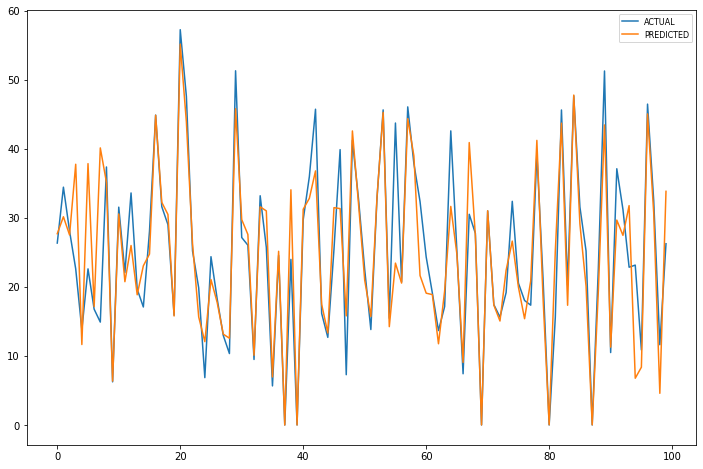

In [ ]:
# Calling run_model to train,fit and evaluation of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

##**Visualising the evaluatin matrix to choose from the above created models as our final prediction model**


In [ ]:
#creating dictionary to store all the metrices
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [ ]:
#list of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','Decision_Tree','Random_Forest','Gradient_Boosting',]

In [ ]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [ ]:
matrices_df

,Linear,Lasso,Ridge,Elasticnet,Polynomial,Decision_Tree,Random_Forest,Gradient_Boosting
Mean_square_error,191763.431616,191763.431616,191822.267866,191835.560576,152553.027520,38.472136,27.014110,30.642100
Root_Mean_square_error,437.908017,437.908017,437.975191,437.990366,390.580373,6.202591,5.197510,5.535531
R2,0.533574,0.533574,0.533430,0.533398,0.628945,0.748849,0.823648,0.799964
Adjusted_R2,0.531002,0.531002,0.530859,0.530826,0.626900,0.747464,0.822676,0.798862


In [ ]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
final_matrices

,Models,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,Linear,191763.431616,437.908017,0.533574,0.531002
1,Lasso,191763.431616,437.908017,0.533574,0.531002
2,Ridge,191822.267866,437.975191,0.533430,0.530859
3,Elasticnet,191835.560576,437.990366,0.533398,0.530826
4,Polynomial,152553.027520,390.580373,0.628945,0.626900
5,Decision_Tree,38.472136,6.202591,0.748849,0.747464
6,Random_Forest,27.014110,5.197510,0.823648,0.822676
7,Gradient_Boosting,30.642100,5.535531,0.799964,0.798862


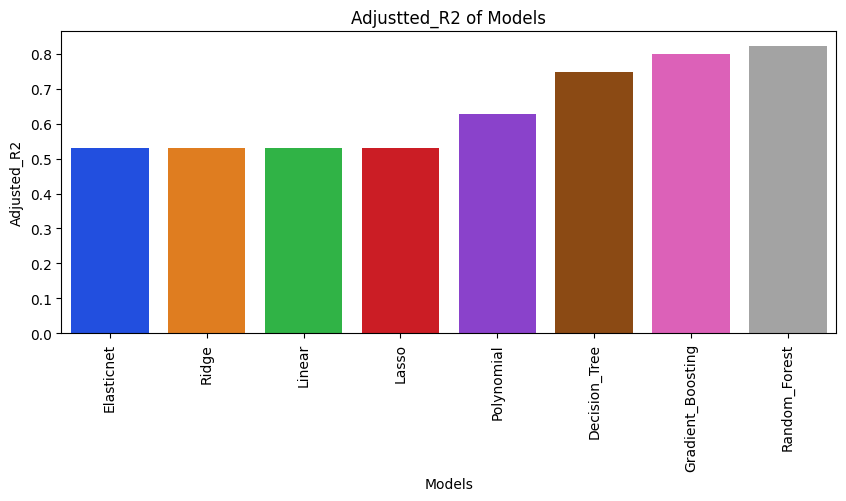

In [ ]:
#creating bar plot to visualize the Adjusted R2 of model.
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="bright").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

The top-performing models in terms of mean squred error, Root mean squred error, R2, and Adjested R2 are the random forest and GradientBoost models, with identical scores for all metrics. This suggests that these models are equally good at predicting the target variable.

#Conclusion :- EDA

* The  highest demand for rental bikes was noted in June.
* Summer is the busiest season in regards to rented bike demand Peak demand for rented bike is around 6pm (18:00).
* Rented bike demand is less during winter season, in comparison to other seasons .
* On working day, the rental bike demand is high in comparison to holiday

# **conclusion:-**  ML model     
In conclusion, a machine learning model for predicting bike sharing demand can be developed using various algorithms such as linear regression, decision trees, and random forests. The model's performance can be evaluated using metrics such as mean absolute error and mean squared error. The key features that influence demand, such as temperature, humidity, and time of day, can be used as input variables for the model. Additionally, incorporating external data sources, such as weather forecasts and event schedules, can improve the accuracy of the model. However, it is also important to note that the model should be regularly retrained and updated with new data to ensure its continued performance.

* Linear model, Lasso model, Ridge model,Elasticnet and polynomial model have Adjusted-R2 value below 65%.

* According to Decision tree and random forest tests, temperature is the most important feature and has the highest impact on rented bike demand.

* On the basis of R2 and Adjusted-R2, Decision tree, Random Forest and gradient boost model are best as the accuracy of these models are above 75% and also their Adjusted-R2 values are less than R2 values.

* Random forest model's R2 and Adjusted-R2 values are 0.822 and 0.821 respectively.

